In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.optimizers import Adam
import numpy as np

train = "Data/readelf/train.npz"
val = "Data/readelf/val.npz"
test = "Data/readelf/test.npz"

# Load numpy array
training_dataset = np.load(train)
val_dataset = np.load(val)
test_dataset = np.load(test)

x_train = training_dataset['x']
y_train = training_dataset['y']

x_val = val_dataset['x']
y_val = val_dataset['y']

x_test = test_dataset['x']
y_test = test_dataset['y']

print("Training shape: ", x_train.shape, y_train.shape)
print("Validation shape: ", x_val.shape, x_val.shape)
print("Test shape: ", x_test.shape, y_test.shape)

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Training shape:  (1200, 3840, 64) (1200, 3840, 64)
Validation shape:  (400, 3840, 64) (400, 3840, 64)
Test shape:  (400, 3840, 64) (400, 3840, 64)


In [2]:
# Base model
model = Sequential()
model.add(LSTM(64, input_shape=(3840, 64), return_sequences=True))
model.summary()
adam = Adam(lr=0.00005)
model.compile(optimizer=adam, loss='mean_absolute_error', metrics=['acc'])

# Fitting the model
history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val),
                    shuffle=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3840, 64)          33024     
Total params: 33,024
Trainable params: 33,024
Non-trainable params: 0
_________________________________________________________________
Train on 1200 samples, validate on 400 samples
Epoch 1/100
1200/1200 [==============================] - 221s 184ms/step - loss: 0.0498 - acc: 0.0127 - val_loss: 0.0292 - val_acc: 0.0012
Epoch 2/100
1200/1200 [==============================] - 211s 176ms/step - loss: 0.0425 - acc: 0.0013 - val_loss: 0.0256 - val_acc: 6.5495e-04
Epoch 3/100
1200/1200 [==============================] - 204s 170ms/step - loss: 0.0376 - acc: 0.0014 - val_loss: 0.0231 - val_acc: 7.8451e-04
Epoch 4/100
1200/1200 [==============================] - 204s 170ms/step - loss: 0.0339 - acc: 0.0015 - val_loss: 0.0211 - val_acc: 7.8516e-04
Epoch 5/100
1200/1200 [============================

Epoch 55/100
1200/1200 [==============================] - 208s 173ms/step - loss: 0.0059 - acc: 4.0690e-04 - val_loss: 0.0039 - val_acc: 2.6823e-04
Epoch 56/100
1200/1200 [==============================] - 207s 173ms/step - loss: 0.0058 - acc: 4.2578e-04 - val_loss: 0.0038 - val_acc: 2.6823e-04
Epoch 57/100
1200/1200 [==============================] - 206s 172ms/step - loss: 0.0056 - acc: 0.0141 - val_loss: 0.0037 - val_acc: 2.6823e-04
Epoch 58/100
1200/1200 [==============================] - 208s 173ms/step - loss: 0.0055 - acc: 0.0134 - val_loss: 0.0036 - val_acc: 2.6823e-04
Epoch 59/100
1200/1200 [==============================] - 206s 171ms/step - loss: 0.0054 - acc: 4.2752e-04 - val_loss: 0.0035 - val_acc: 2.6888e-04
Epoch 60/100
1200/1200 [==============================] - 204s 170ms/step - loss: 0.0053 - acc: 4.2752e-04 - val_loss: 0.0035 - val_acc: 2.6888e-04
Epoch 61/100
1200/1200 [==============================] - 203s 170ms/step - loss: 0.0051 - acc: 4.2817e-04 - val_loss: 0

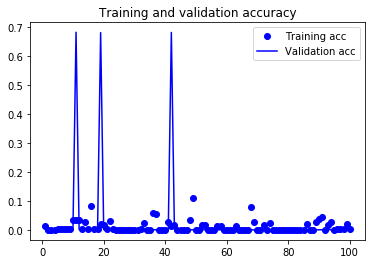

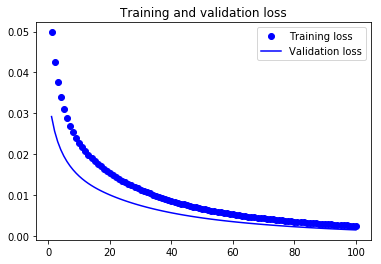

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [4]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

400/400 [==============================] - 15s 36ms/step
Test accuracy: 0.0024876302340999246
Test loss: 0.001946750464849174
